J41112 Шваб Кирилл
# <center>Лабораторная работа 2</center>
<center>Вариант 15</center>

## Задание 1

Пусть акция стоит 1000\$. На рынке можно купить европейский Call опцион со Strike price
X = 970\$ по цене 50\$  с погашением через T = 1 год. У Васи, Пети и Коли есть вера и 1000\$ у
каждого, они хотят вложиться в эти акции. Посчитайте результаты их инвестиций (абсолютные
и в процентах), если Вася купит только один опцион, Петя - одну акцию, Коля - опционы на
все деньги, и цена акции через год будет

- 900\$  
- 940\$
- 1000\$
- 1050\$
- 1100\$

1. Для расчета финансового результата <strong>Васи</strong> необходимо воспользоваться следующей формулой:
$$max(S-X, 0)- 50\$ $$ 

2. Для расчета финансового результата для <strong>Пети</strong> необходимо воспользоваться следующей формулой: 
$$S_1-S_0$$ 


3. Для расчета финансового результата для <strong>Коли</strong> (20 опционов по 50\$ за каждый) необходимо воспользоваться следующей формулой: 
 $$max(S - X , 0)\cdot20-20\cdot50\$ $$ 
 

In [1]:
import pandas as pd
import numpy as np

money = 1000 # цена акции
strike_price = 970 # цена экспирации
euro_call = 50 # цена за опцион
prices = np.array([900, 940, 1000, 1050, 1100]) # цены акций через год


def vasya_result(x, s, euro_call):
        return max(s-x, 0) - euro_call


def petya_result(s1, s0):
        return s1 - s0


def kolya_result(x, s, euro_call):
        return (money/euro_call) * (max(s - x, 0) - euro_call)


def exercise_1(s0, x, euro_call, spot_prices: np.array) -> pd.DataFrame:
        """Задание 1. Инвестиции"""
        # значения для Васи
        vasya = np.array([vasya_result(x, s, euro_call) for s in spot_prices])
        # значения для Пети
        petya =  np.array([petya_result(s1, s0) for s1 in spot_prices])
        # значения для Коли
        kolya = np.array([kolya_result(x,s,euro_call) for s in spot_prices])

        # Совместные результаты
        result_absolute = vasya + petya + kolya
        result_relative  = np.round(100 * result_absolute / (3 * s0),2)

        book = {'Цена акции': spot_prices,
                'Вася': vasya,
                'Петя': petya,
                'Коля': kolya,
                'Совместный абсолютный результат': result_absolute,
                'Совместный относительный результат, %': result_relative}
        return pd.DataFrame(book)

exercise_1(money, strike_price,euro_call,prices)

,Цена акции,Вася,Петя,Коля,Совместный абсолютный результат,"Совместный относительный результат, %"
0,900,-50,-100,-1000.0,-1150.0,-38.33
1,940,-50,-60,-1000.0,-1110.0,-37.00
2,1000,-20,0,-400.0,-420.0,-14.00
3,1050,30,50,600.0,680.0,22.67
4,1100,80,100,1600.0,1780.0,59.33


## Задание 2
Пусть цена европейского Put опциона с X = 500\$ равна 3\$, а текущая цена акции pавна
S = 502\$. Найдите цену европейского Call опциона с тем же страйком, если $r = 5%$ и $T −t = 1$.
Ответ округлите до целых.

Цены Европейских Put и Call опционов с одинаковыми параметрами связаны формулой: $$C-P=S(t)-Xe^{-r(T-t)}$$
$$C = P + S(t)-Xe^{-r(T-t)}$$

In [2]:
from math import exp
def exercise_2():
    """Задание 2. Найти Put опцион из уравнения"""
    x = 500 # страйк цена
    r = 5 # процент чего?
    dt = 1 # время для исполнения
    s_t = 502 # форвардная или не форвардная цена ?
    put = 3 # цена за пут опцион
    euro_call = put + s_t - x* exp(-(r/100)*dt)
    return round(euro_call)
print(f'Цена Европейского Put опциона = {exercise_2()}$')

Цена Европейского Put опциона = 29$


## Задание 3



#### a) Для Европейских опционов построить графики зависимостей:
 - Цен и payoff-ов от цены базового актива
 - $∆$,$Γ$, $Θ$, $Vega$, $ρ$ от цены базового актива
 - <strong>Put-Call parity</strong>


#### b) Пронаблюдать зависимость цены Европейского опциона от $T-t$, $r$ от $σ$ , сравнить с Греками.

### A) Для европейских опционов построим цены опционов и payoff от цен 

#### Для Call и Put опционов формулы cоответственно:
$$
C(S, t) = N(d_1)S - N(d_2)Ke^{-r(T-t)}
$$

$$
P(S, t) = N(-d_2)Xe^{-r(T-t)} - N(-d_1)S
$$

$$
d_1 = \frac{1}{\sigma\sqrt{T-t}}\Bigl[ln\Bigl(\frac{S_t}{k}\Bigr) + \Bigl(r + \frac{\sigma^2}{2}\Bigr)(T-t)\Bigr]  $$
$$d_2 = d_1 - \sigma\sqrt{T-t}$$

- $S$ - текущая цена базисной акции
- $N(x)$ - 
- $K$ - цена исполнения опциона
- $r$ - безрисковая процентная ставка
- $T - t$ - время до истечения опциона
- $\sigma$ - волатильность 

распишем функции

In [60]:
import math
from scipy import stats
import matplotlib.pyplot as plt

strike_price = 100
range_value = 10
r = 0.001
sigma = 0.03
T = 4
D = 0

In [61]:
# Расчет pay-off для call
def payoff_call(s):
    return max(s - strike_price, 0)

# Расчет pay-off для put
def payoff_put(s):
    return max(strike_price - s, 0)

# Расчет цены для call опциона
def fair_value_call(s,T):
    return stats.norm.cdf(d1(s, T))*s - stats.norm.cdf(d2(s, T)) * strike_price * math.e**(-r * T)

# Расчет цены для put опциона
def fair_value_put(s,T):
    return stats.norm.cdf(-d2(s, T))*strike_price * math.e**(-r * T) - stats.norm.cdf(-d1(s, T))*s


def d1(s, dt):
    return (math.log(s/strike_price) + (r + sigma**2/2) * dt)/(sigma * math.sqrt(dt))


def d2(s,dt):
    return d1(s, dt) - sigma * math.sqrt(dt)



In [62]:
# Выдает call и put для payoff 
def get_payoff():
    call, put = [], []
    for i in range(strike_price - range_value, strike_price + range_value, 1):
        call.append(payoff_call(i))
        put.append(payoff_put(i))
    return np.array(call), np.array(put)
    
# Выдает call и put для fair value
def get_fair_value():
    call, put = [], []
    for i in range(strike_price - range_value, strike_price + range_value, 1):
        call.append(fair_value_call(i,T))
        put.append(fair_value_put(i,T))
    return np.array(call), np.array(put)
  

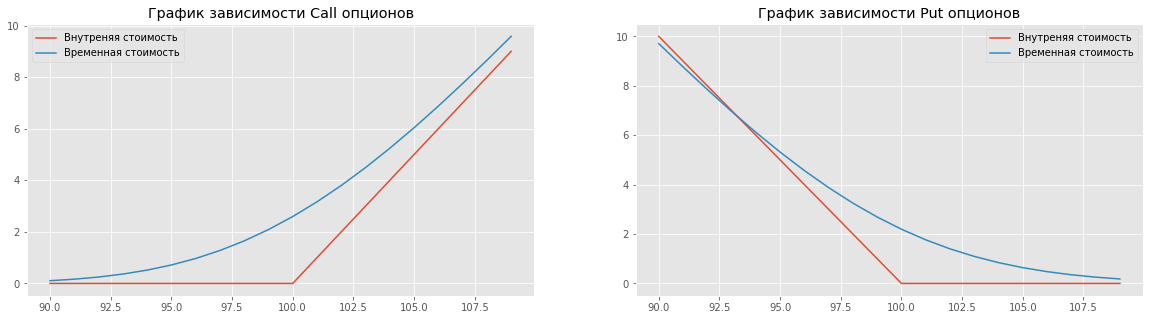

In [63]:
payoff_call_arr , payoff_put_arr = get_payoff() 
fair_value_call_arr , fair_value_put_arr = get_fair_value()

def draw_graphics():

    plt.figure(figsize=(20, 5))
    plt.style.use('ggplot')

    plt.subplot(1, 2, 1)
    plt.title('График зависимости Call опционов')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), payoff_call_arr, label='Внутреняя стоимость')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), fair_value_call_arr,label ='Временная стоимость')
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.title('График зависимости Put опционов')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), payoff_put_arr,label='Внутреняя стоимость')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), fair_value_put_arr, label='Временная стоимость')
    plt.legend(loc='best')
draw_graphics()

### Построение греков
можно посмотреть термины  [здесь](https://bcs-express.ru/novosti-i-analitika/osnovnye-terminy-i-poniatiia-pri-rabote-s-optsionami#:~:text=%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%86%D0%B5%D0%BD%D0%B0%20%D0%BE%D0%BF%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%20%E2%80%94%20%D1%86%D0%B5%D0%BD%D0%B0%20%D0%BE%D0%BF%D1%86%D0%B8%D0%BE%D0%BD%D0%B0,%D1%80%D0%B0%D1%81%D1%81%D1%87%D0%B8%D1%82%D1%8B%D0%B2%D0%B0%D0%B5%D1%82%D1%81%D1%8F%20%D0%BF%D0%BE%20%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%20%D0%B2%D1%8B%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B5)
- описание для самих греков [здесь](https://www.zerich.com/article/Greki/)

Построение Put Call Parity

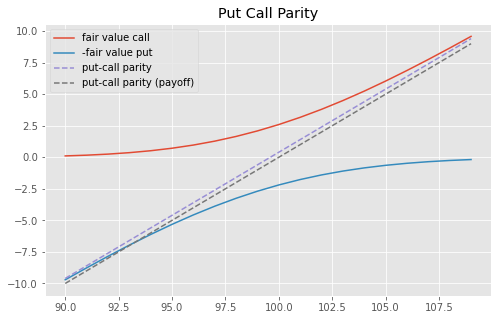

In [65]:
interval = np.arange(strike_price - range_value, strike_price + range_value, 1)
plt.figure(figsize=(8,5))
plt.title('Put Call Parity')
# fair put
plt.plot(interval,fair_value_call_arr, label='fair value call')
# fair call
plt.plot(interval,-fair_value_put_arr,label ='-fair value put')
# put call
plt.plot(interval,interval-strike_price*np.exp(-r*T),
label='put-call parity', linestyle='dashed')

plt.plot(interval, payoff_call_arr- payoff_put_arr,
label='put-call parity (payoff)', linestyle='dashed')

plt.legend(loc='best')
plt.show()